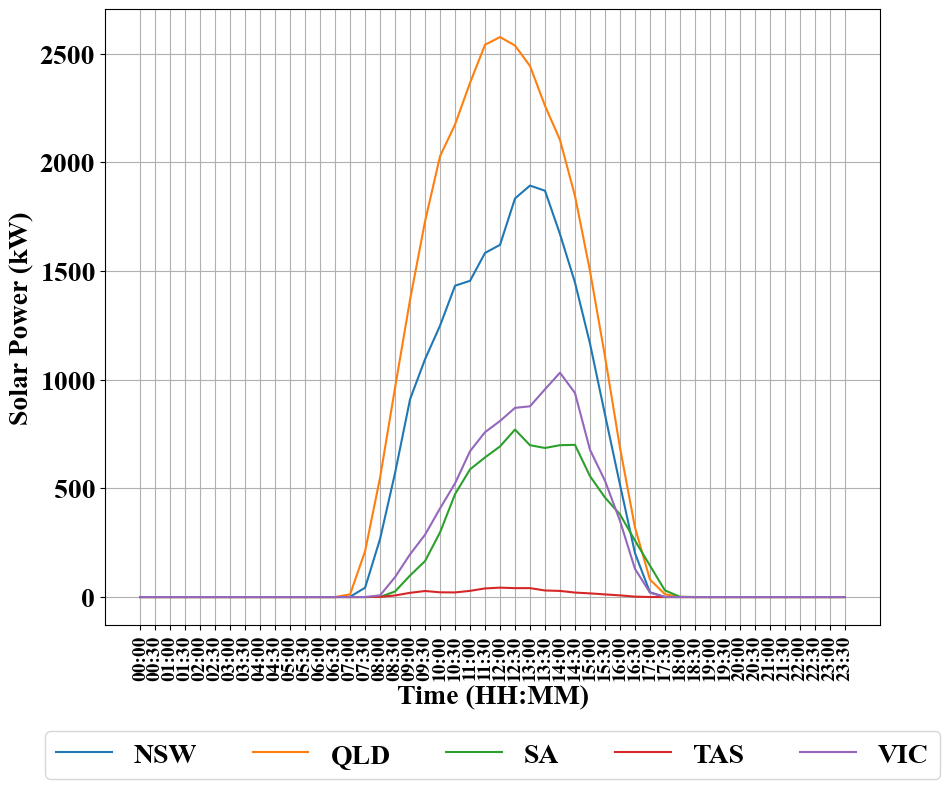

In [2]:
import matplotlib.pyplot as plt

# Dataset for each region (48 entries each)
solar_profile = {
    'NSW': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.376, 43.075, 267.996, 571.332, 909.973, 1094.175, 1248.706, 1432.081, 1454.66, 1582.929, 1620.056, 1833.422, 1892.649, 1868.952, 1669.518, 1447.044, 1166.468, 840.143, 517.692, 202.727, 21.929, 0.057, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'QLD': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12.58, 211.284, 550.175, 963.994, 1368.202, 1728.82, 2028.076, 2173.82, 2365.308, 2540.388, 2575.923, 2536.637, 2442.761, 2259.855, 2102.84, 1845.243, 1500.109, 1107.418, 687.743, 321.143, 80.799, 12.864, 0.59, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'SA': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.558, 25.748, 99.205, 165.586, 297.709, 473.272, 587.522, 642.254, 692.904, 770.326, 698.367, 685.698, 698.519, 700.014, 556.33, 458.006, 380.475, 260.294, 144.986, 30.575, 1.235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'TAS': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.825, 7.332, 19.469, 27.791, 21.822, 21.236, 28.424, 39.655, 43.19, 40.927, 41.08, 30.199, 28.195, 20.592, 16.817, 12.134, 7.618, 1.948, 0.059, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'VIC': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.005, 7.811, 91.952, 196.79, 286.966, 407.908, 523.096, 671.067, 758.398, 809.97, 870.232, 877.408, 955.78, 1031.802, 938.662, 677.735, 535.202, 350.939, 130.108, 20.367, 0.655, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

# Time labels (48 half-hour intervals)
time_labels = [f"{hour:02d}:{minute:02d}" for hour in range(24) for minute in [0, 30]]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
for region, profile in solar_profile.items():
    ax.plot(time_labels, profile, label=region)

# Set font properties for axes labels
font_prop = {'family': 'Times New Roman', 'size': 20, 'weight': 'bold'}
ax.set_xlabel('Time (HH:MM)', fontdict=font_prop)
ax.set_ylabel('Solar Power (kW)', fontdict=font_prop)

ax.legend()
ax.legend(prop=font_prop, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

plt.xticks(rotation=90, fontname='Times New Roman', fontsize=14, fontweight='bold', ha='center')
plt.yticks(rotation=0, fontname='Times New Roman', fontsize=20, fontweight='bold')

#plt.title('Solar Profile for Different Regions')
plt.grid(True)
# Add legend below the plot

# Set font properties for all text
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})

# Save the plot
plt.savefig('Solar_profile_plot.pdf', format='pdf', bbox_inches='tight')

# Display plot
plt.show()



C:\Users\selima\AppData\Local\Temp\ipykernel_28476\2965715420.py:30: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=len(time_labels) // 2)


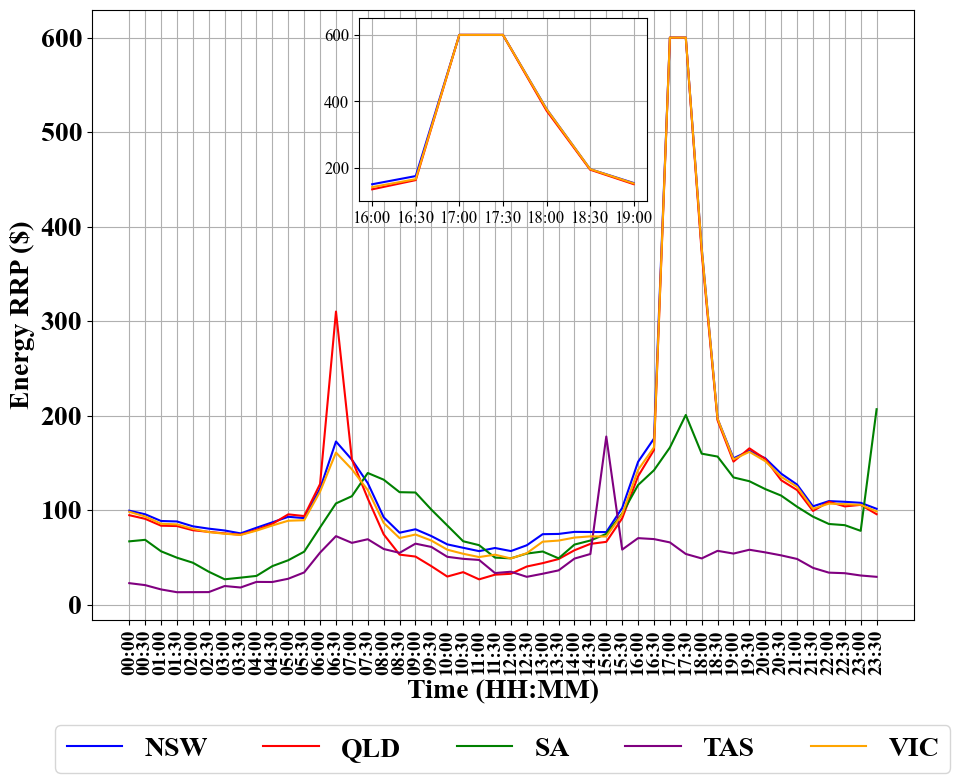

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data
tariff_prices = {
    'NSW': [99.34, 95.51, 88.41, 87.9, 82.77, 80.29, 78.36, 75.29, 81.26, 87, 92.83, 91.46, 122.65, 172.54, 153.32, 128.48, 92.38, 76.01, 79.65, 72.44, 63.66, 60.05, 56.5, 59.83, 56.57, 62.71, 74.45, 74.71, 76.89, 76.76, 76.67, 102.19, 151.03, 175.66, 600, 600, 377.38, 196.43, 154.77, 162.63, 154.79, 138.49, 126.93, 103.93, 109.45, 108.73, 107.64, 101.32],
    'QLD': [94.53, 90.69, 83.43, 83.05, 78.61, 76.9, 75.27, 73.87, 79.05, 85.34, 95.44, 93.62, 127.56, 310.08, 153.59, 112.18, 74.29, 52.81, 50.76, 40.57, 29.59, 34.26, 26.64, 31.58, 32.52, 40.22, 43.79, 48.13, 57.44, 64.17, 66.33, 91.2, 135.77, 163.53, 600, 600, 372.43, 194.91, 151.28, 165.32, 154.06, 131.56, 121.15, 99.05, 108.73, 103.86, 105.46, 95.61],
    'SA': [66.86, 68.47, 56.32, 49.55, 44.23, 34.71, 26.7, 28.44, 30.28, 40.64, 46.87, 55.92, 81.63, 107, 114.65, 139.21, 132.13, 118.9, 118.56, 100.42, 83.68, 66.95, 62.82, 49.65, 48.9, 53.92, 56.11, 48.89, 63.45, 67.74, 74.74, 96.26, 126.48, 142.12, 166.15, 200.62, 159.67, 156.59, 134.51, 130.49, 122.16, 115.26, 103.48, 93, 85.25, 83.99, 77.98, 206.72],
    'TAS': [22.61, 20.53, 15.97, 13.03, 13.09, 13.15, 19.57, 18.02, 23.94, 23.83, 27.29, 33.96, 54.96, 72.37, 65.25, 69.1, 58.78, 54.69, 64.42, 60.94, 50.5, 48.35, 47.19, 33.31, 34.7, 29.31, 32.57, 36.13, 48.62, 53.47, 177.81, 58.13, 70.26, 69.25, 65.75, 53.51, 48.78, 56.82, 53.92, 57.97, 55.19, 52.02, 48.22, 38.79, 33.74, 33.15, 30.72, 29.31],
    'VIC': [98.12, 93.17, 85.48, 84.82, 80.07, 76.62, 74.93, 73.62, 78.18, 83.64, 88.69, 89.19, 119.49, 160.82, 143.17, 121.11, 86.37, 70.31, 74.08, 67.7, 58.03, 53.71, 50.24, 52.76, 48.72, 54.35, 66.5, 67.68, 70.86, 72.13, 71.96, 95.4, 142.51, 166.38, 600, 600, 377.04, 196.59, 153.62, 161.65, 151.72, 135.17, 124.55, 101.33, 106.77, 106.22, 105.48, 98.56]
}

# Generate time labels for X-axis
time_labels = ['{:02d}:{:02d}'.format(*divmod(i * 30, 60)) for i in range(len(tariff_prices['NSW']))]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot tariff prices for each region
ax.plot(time_labels, tariff_prices['NSW'], color='blue', label='NSW')
ax.plot(time_labels, tariff_prices['QLD'], color='red', label='QLD')
ax.plot(time_labels, tariff_prices['SA'], color='green', label='SA')
ax.plot(time_labels, tariff_prices['TAS'], color='purple', label='TAS')
ax.plot(time_labels, tariff_prices['VIC'], color='orange', label='VIC')

# Rotate and align the X-axis labels
plt.xticks(rotation=90, fontname='Times New Roman', fontsize=14, fontweight='bold', ha='center')
plt.yticks(rotation=0, fontname='Times New Roman', fontsize=20, fontweight='bold')

plt.locator_params(axis='x', nbins=len(time_labels) // 2)

# Set font properties for axes labels
font_prop = {'family': 'Times New Roman', 'size': 20, 'weight': 'bold'}
ax.set_xlabel('Time (HH:MM)', fontdict=font_prop)
ax.set_ylabel('Energy RRP ($)', fontdict=font_prop)

# Add grid lines
ax.grid(True)

# Set font properties for all text
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 12})

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, prop={'size': 20, 'weight': 'bold'})


# Adjust plot layout
plt.tight_layout()

# Create zoomed plot
zoomed_axes = inset_axes(ax, width="35%", height="30%", loc='upper center')

# Plot zoomed region
zoomed_axes.plot(time_labels[32:39], tariff_prices['NSW'][32:39], color='blue', label='NSW')
zoomed_axes.plot(time_labels[32:39], tariff_prices['QLD'][32:39], color='red', label='QLD')
zoomed_axes.plot(time_labels[32:39], tariff_prices['VIC'][32:39], color='orange', label='VIC')

# Set y-axis limit
zoomed_axes.set_ylim(100, 650)

# Set font properties for axes labels in zoomed plot
#zoomed_axes.set_xlabel('Time (HH:MM)', fontdict=font_prop)
#zoomed_axes.set_ylabel('Tariff Price', fontdict=font_prop)

# Add grid lines to zoomed plot
zoomed_axes.grid(True)

# Adjust layout of zoomed plot
zoomed_axes.set_position([0.6, 0.7, 0.3, 0.2])

# Save the plot
plt.savefig('tariff_prices_plot.pdf', format='pdf')

# Display plot
plt.show()


C:\Users\selima\AppData\Local\Temp\ipykernel_28476\478872770.py:28: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(axis='x', nbins=len(time_labels)//2)


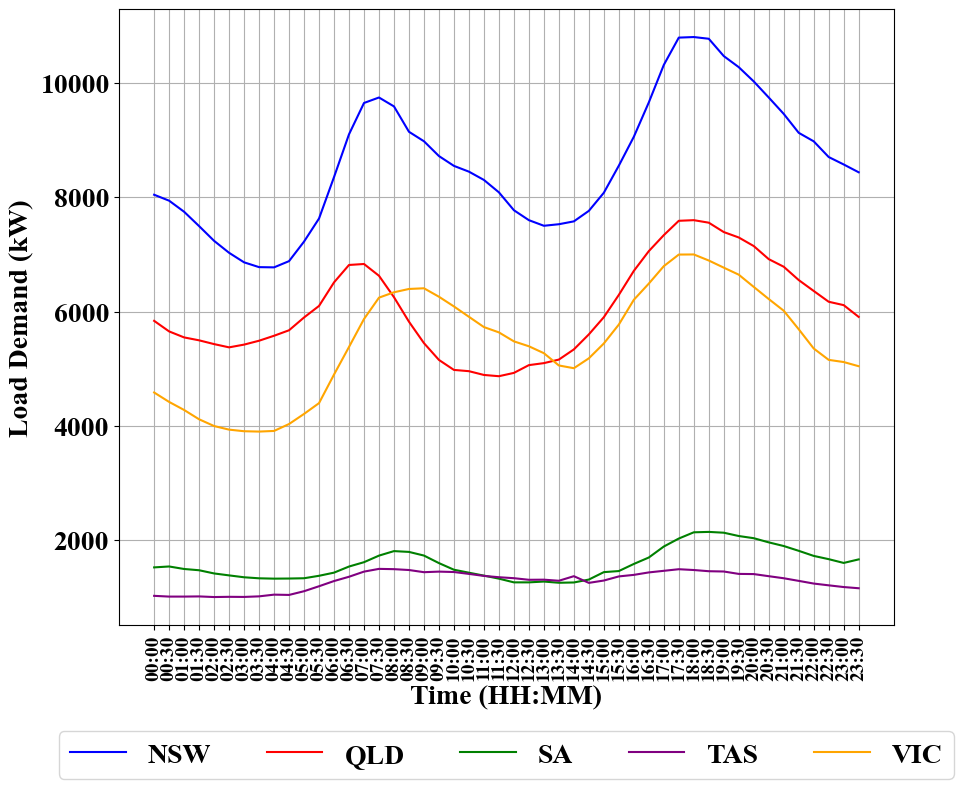

In [4]:
import matplotlib.pyplot as plt

# Load profile data
load_profile = {
    'NSW': [8047, 7943, 7749, 7498, 7240, 7031, 6864, 6780, 6776, 6885, 7227, 7631, 8356, 9105, 9653, 9749, 9593, 9149, 8983, 8724, 8552, 8451, 8306, 8089, 7776, 7602, 7504, 7531, 7581, 7765, 8082, 8556, 9061, 9663, 10319, 10797, 10807, 10777, 10474, 10280, 10030, 9749, 9462, 9131, 8982, 8707, 8577, 8440],
    'QLD': [5840, 5655, 5550, 5499, 5433, 5376, 5424, 5492, 5579, 5675, 5899, 6101, 6513, 6818, 6835, 6629, 6254, 5825, 5450, 5156, 4981, 4959, 4893, 4871, 4929, 5065, 5100, 5162, 5340, 5603, 5904, 6294, 6714, 7060, 7340, 7591, 7602, 7558, 7394, 7299, 7149, 6920, 6787, 6554, 6363, 6174, 6115, 5909],
    'SA': [1525, 1541, 1497, 1475, 1419, 1385, 1352, 1334, 1328, 1330, 1335, 1378, 1433, 1540, 1616, 1731, 1810, 1796, 1732, 1600, 1484, 1432, 1381, 1328, 1263, 1263, 1277, 1256, 1261, 1312, 1442, 1461, 1585, 1698, 1890, 2030, 2139, 2146, 2132, 2074, 2036, 1963, 1899, 1815, 1726, 1669, 1603, 1665],
    'TAS': [1027, 1014, 1014, 1017, 1006, 1010, 1008, 1018, 1048, 1043, 1108, 1195, 1286, 1361, 1451, 1499, 1494, 1479, 1441, 1451, 1444, 1411, 1376, 1353, 1336, 1308, 1310, 1291, 1371, 1254, 1295, 1367, 1394, 1437, 1465, 1493, 1479, 1458, 1453, 1411, 1408, 1371, 1335, 1289, 1242, 1211, 1181, 1160],
    'VIC': [4586, 4421, 4280, 4117, 3999, 3936, 3908, 3902, 3913, 4034, 4211, 4400, 4900, 5383, 5872, 6246, 6340, 6398, 6410, 6262, 6092, 5911, 5731, 5638, 5481, 5395, 5274, 5059, 5011, 5184, 5444, 5775, 6208, 6492, 6797, 7000, 7002, 6896, 6771, 6648, 6434, 6222, 6017, 5693, 5356, 5157, 5119, 5046]
}

# Generate time labels for X-axis
time_labels = ['{:02d}:{:02d}'.format(*divmod(i*30, 60)) for i in range(48)]

# Plotting
fig, ax = plt.subplots(figsize=(10, 8))

# Plot load profile for each region
ax.plot(time_labels, load_profile['NSW'], color='blue', label='NSW')
ax.plot(time_labels, load_profile['QLD'], color='red', label='QLD')
ax.plot(time_labels, load_profile['SA'], color='green', label='SA')
ax.plot(time_labels, load_profile['TAS'], color='purple', label='TAS')
ax.plot(time_labels, load_profile['VIC'], color='orange', label='VIC')

# Rotate and align the X-axis labels
plt.xticks(rotation=90, fontname='Times New Roman', fontsize=14, fontweight='bold', ha='center')
plt.yticks(rotation=0, fontname='Times New Roman', fontsize=20, fontweight='bold')
plt.locator_params(axis='x', nbins=len(time_labels)//2)

# Set font properties for axes labels
font_prop = {'family': 'Times New Roman', 'size': 20, 'weight': 'bold'}
ax.set_xlabel('Time (HH:MM)', fontdict=font_prop)
ax.set_ylabel('Load Demand (kW)', fontdict=font_prop)

# Add grid lines
ax.grid(True)

# Add legend below the plot
ax.legend(prop=font_prop, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Set font properties for all text
plt.rcParams.update({'font.family': 'Times New Roman', 'font.size': 20})

# Save the plot
plt.savefig('load_profile_plot.pdf', format='pdf', bbox_inches='tight')

# Display plot
plt.show()
